<a href="https://colab.research.google.com/github/Deeksha-Analyst/Financial-Forecasting-Frontier-Distributed-ML-Distributed-Machine-Learning/blob/main/Colab_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project**   Financial Forecasting Frontier: Distributed ML Distributed Machine Learning

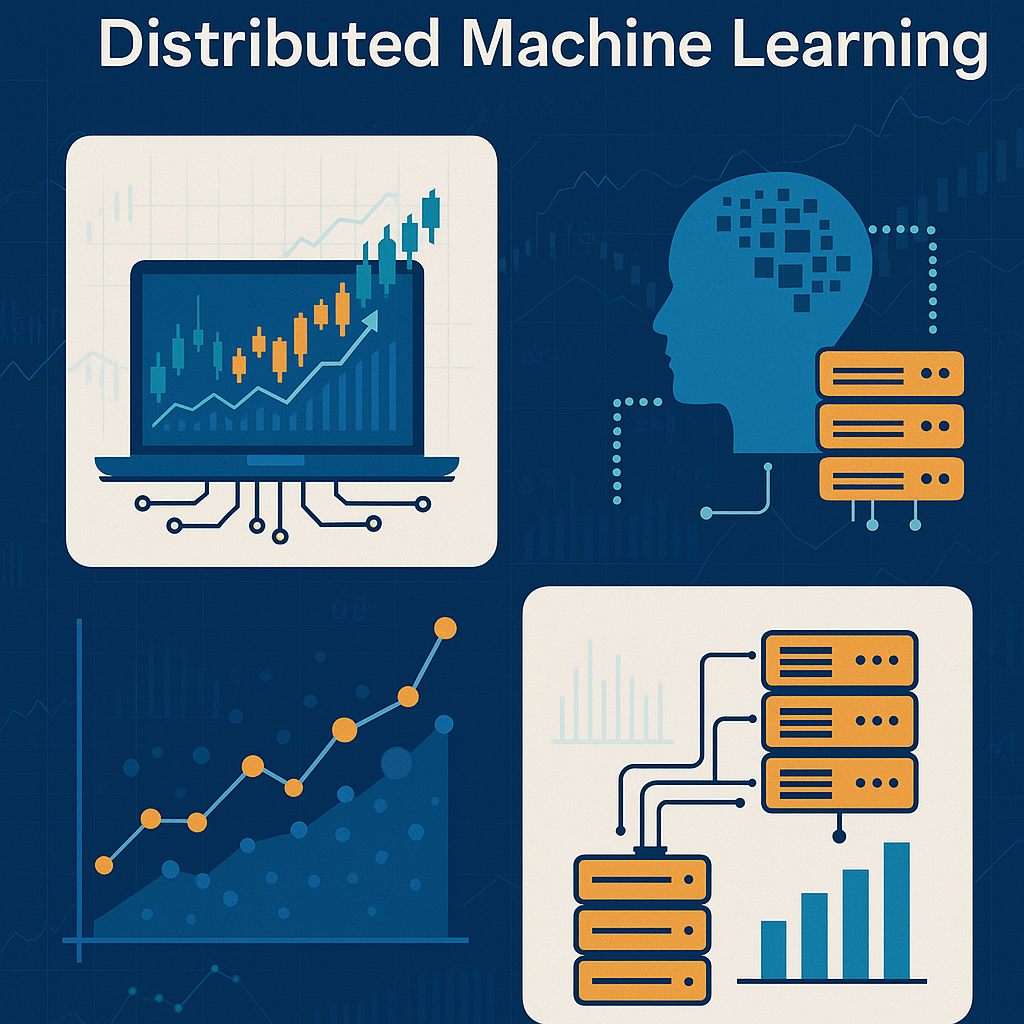

### **Overview**
 The modern banking sector, the ability to efficiently process, analyze, and draw insights from vast volumes of data is crucial. Banks and financial institutions generate and collect extensive data, including customer demographics, transaction histories, market trends, and more. This data, when effectively analyzed, can lead to improved customer service, risk management, marketing strategies, and overall operational efficiency.

# **Problem Statement**

The banking industry faces challenges in managing and utilizing large datasets due to the volume, variety, and velocity of data. Traditional data processing methods often fall short in providing timely insights and handling real-time data streams. With the advent of distributed computing and machine learning technologies, banks now have the opportunity to harness these large datasets to make informed decisions, predict market trends, and enhance customer experiences

Financial forecasting involves predicting future financial outcomes like stock prices, market trends, risk modeling, credit scoring, etc. Accurate forecasting is critical for decision-making in trading, investment, and risk management and Traditional ML methods struggle with large-scale financial data (high-frequency trading, global markets, etc.). Distributed ML enables the parallelization of training across multiple machines or nodes, allowing for faster and more scalable model training.

**Dataset Overview**

age: Age of the individual (integer).

job: Job type (object/string).

marital: Marital status (object/string).

education: Education level (object/string).

default: Indicates if the individual has credit in default (object/string).

balance: Account balance (integer).

housing: Indicates if the individual has a housing loan (object/string).

loan: Indicates if the individual has a personal loan (object/string).

contact: Type of communication contact (object/string).

day: Last contact day of the month (integer).

month: Last contact month of the year (object/string).

duration: Last contact duration, in seconds (integer).

campaign: Number of contacts performed during this campaign for this
client (integer).

pdays: Number of days that passed by after the client was last contacted
from a previous campaign (integer, '-1' means client was not previously contacted).

previous: Number of contacts performed before this campaign and for this client (integer).
poutcome: Outcome

of the previous marketing campaign (object/string).

y: Indicates if the client has subscribed to a term deposit (object/string)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_set =pd.read_csv('/content/drive/MyDrive/ Project-6 Distributed ML Distributed Machine Learning/bank.csv')


**Exploreing the data**

In [ ]:
data_set.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


**Understanding the Dataset Structure**

Column	-             Description

age          -                          	Age of the client

job	-                            Job type

marital    -                 	Marital status

education   -         	Education level

default	    -          Has credit in default?

balance    -       	Account balance

housing	  -           Has housing loan?

loan	   -         Has personal loan?

contact -       	Contact communication type

day	     -       Last contact day of the month

month	  -         Last contact month of year

duration  -     	Last contact duration in seconds

campaign   -    	Number of contacts during campaign

pdays	Days  -    since last contact (-1 means never)

previous -	Number of contacts before current campaign

poutcome	- Outcome of previous campaign

y	 -Target variable: subscribed to term deposit?


In [ ]:
data_set.dropna()        # remove rows with any missing values
data_set.fillna(0)       # fill missing entries with zero
data_set['age'].mean()   # fill missing entries with zero

np.float64(41.17009511170095)

In [ ]:
data_set.fillna(0)       # fill missing entries with zero


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,0
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,0
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,0
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,0


In [ ]:
data_set.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


In [ ]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [ ]:
data_set.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [ ]:
data_set.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [ ]:
# Features and target
X = data_set.drop('y', axis=1)
y = data_set['y']

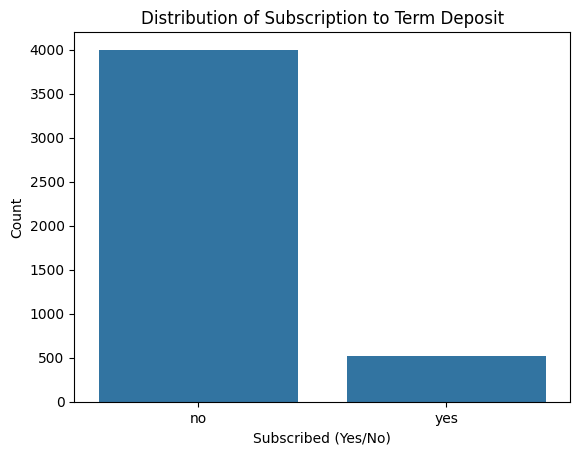

In [ ]:
sns.countplot(x='y', data=data_set)
plt.title("Distribution of Subscription to Term Deposit")
plt.xlabel("Subscribed (Yes/No)")
plt.ylabel("Count")
plt.show()

**Age Distribution**

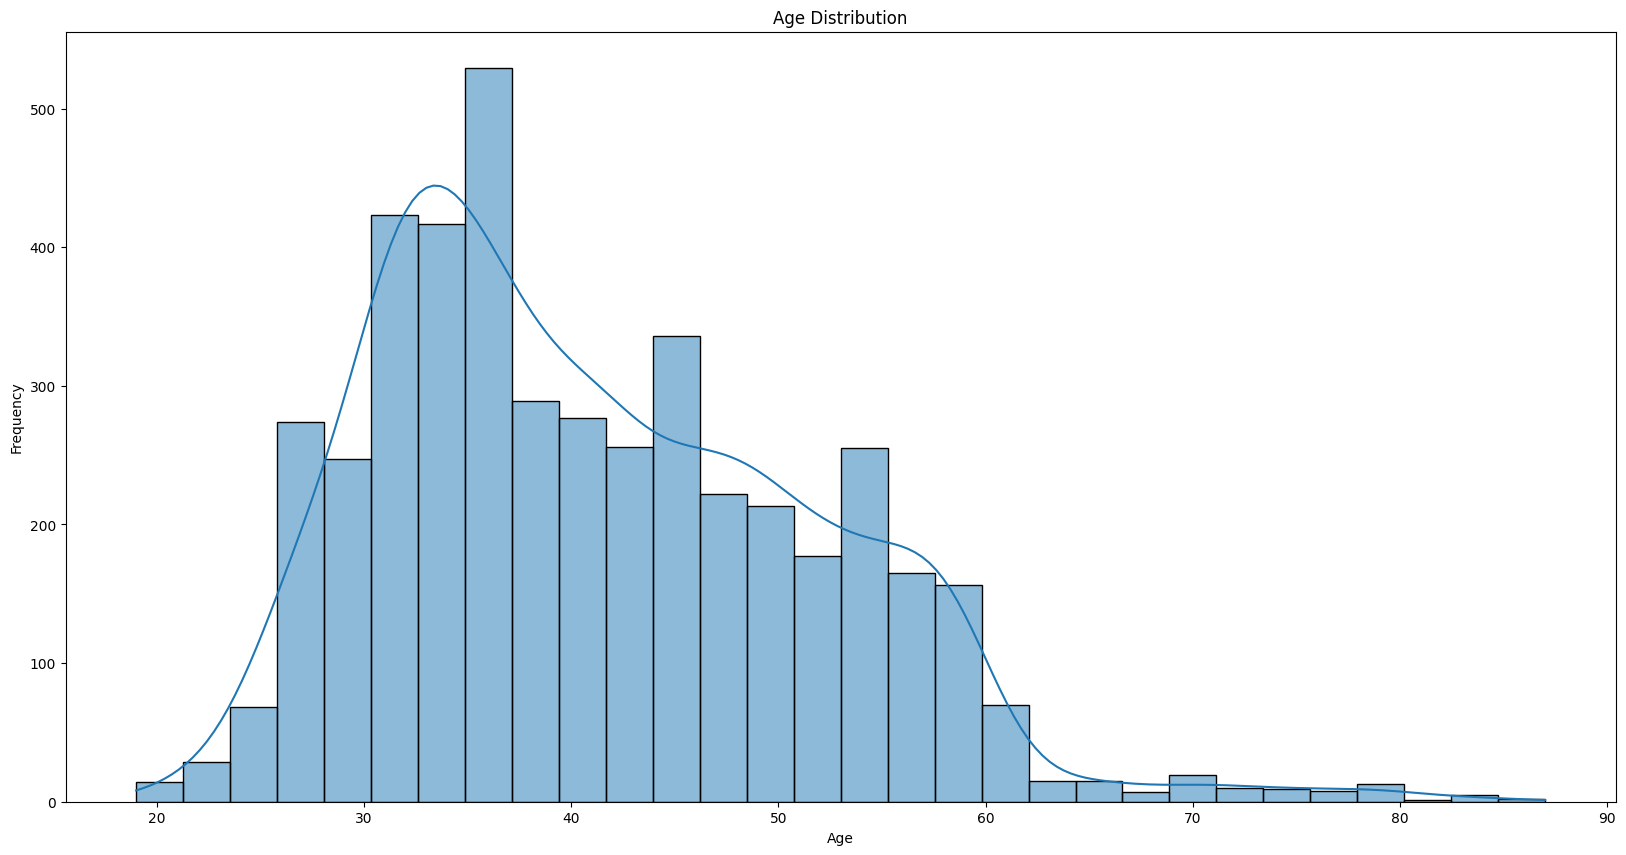

In [ ]:
plt.figure(figsize=(20, 10))
sns.histplot(data_set['age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

**Job vs Subscription Rate**

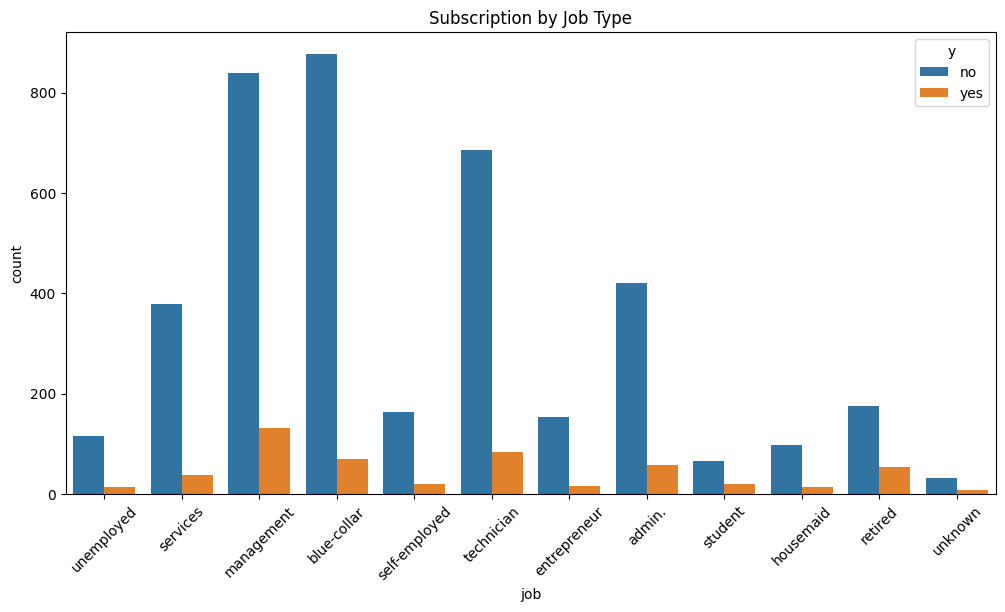

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='job', hue='y', data=data_set)
plt.title("Subscription by Job Type")
plt.xticks(rotation=45)
plt.show()

**Marital Status vs Subscription**

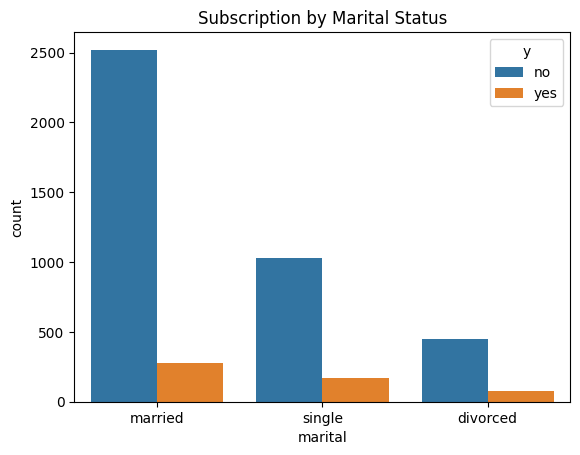

In [ ]:
sns.countplot(x='marital', hue='y', data=data_set)
plt.title("Subscription by Marital Status")
plt.show()

**Education Level vs Subscription**

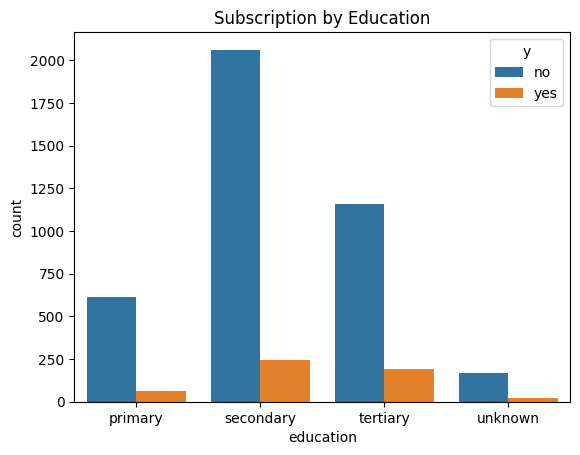

In [ ]:
sns.countplot(x='education', hue='y', data=data_set)
plt.title("Subscription by Education")
plt.show()

**Balance vs Subscription**

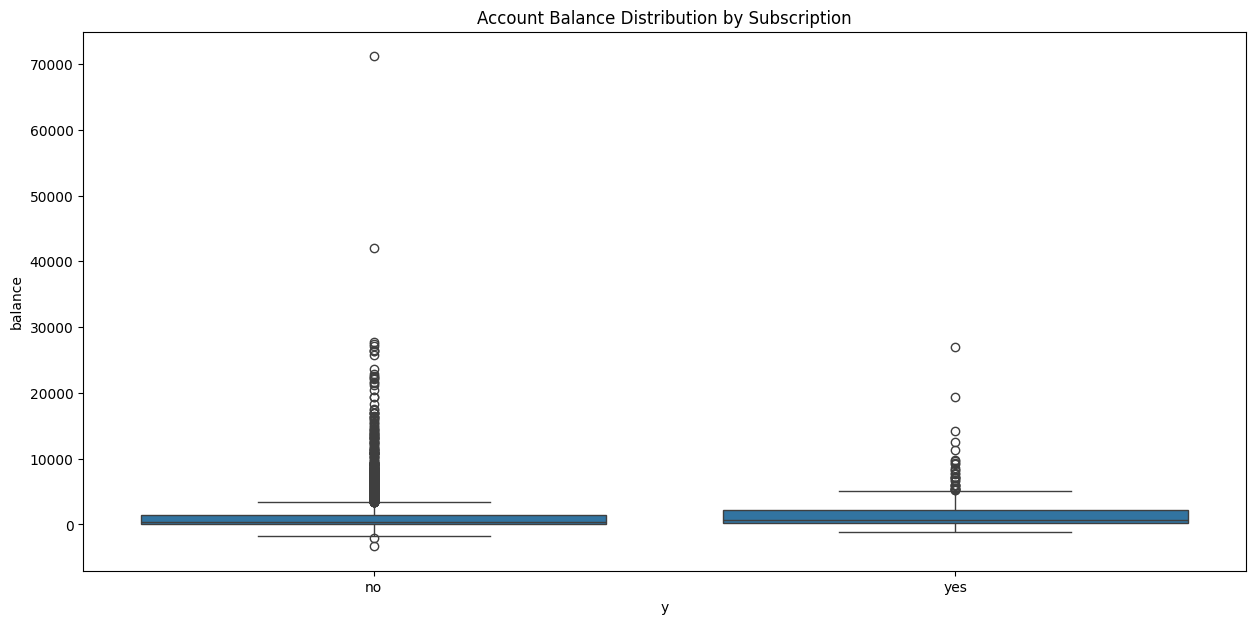

In [ ]:
plt.figure(figsize=(15, 7))
sns.boxplot(x='y', y='balance', data=data_set)
plt.title("Account Balance Distribution by Subscription")
plt.show()

**Campaign Contacts vs Outcome**

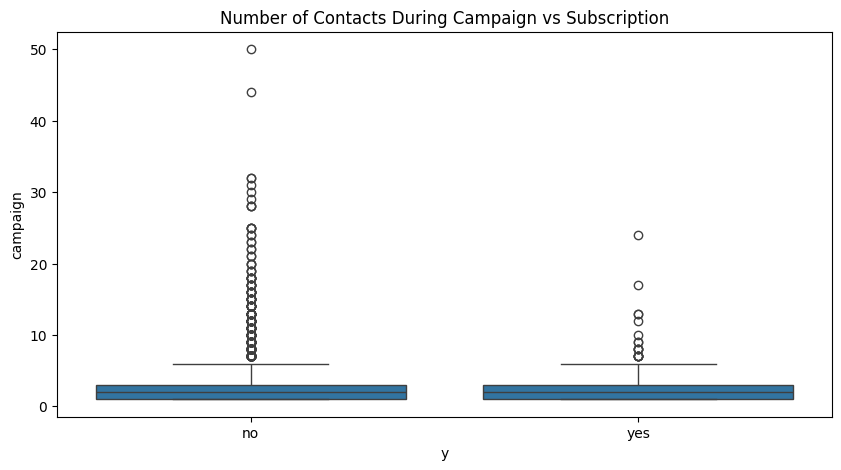

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='y', y='campaign', data=data_set)
plt.title("Number of Contacts During Campaign vs Subscription")
plt.show()

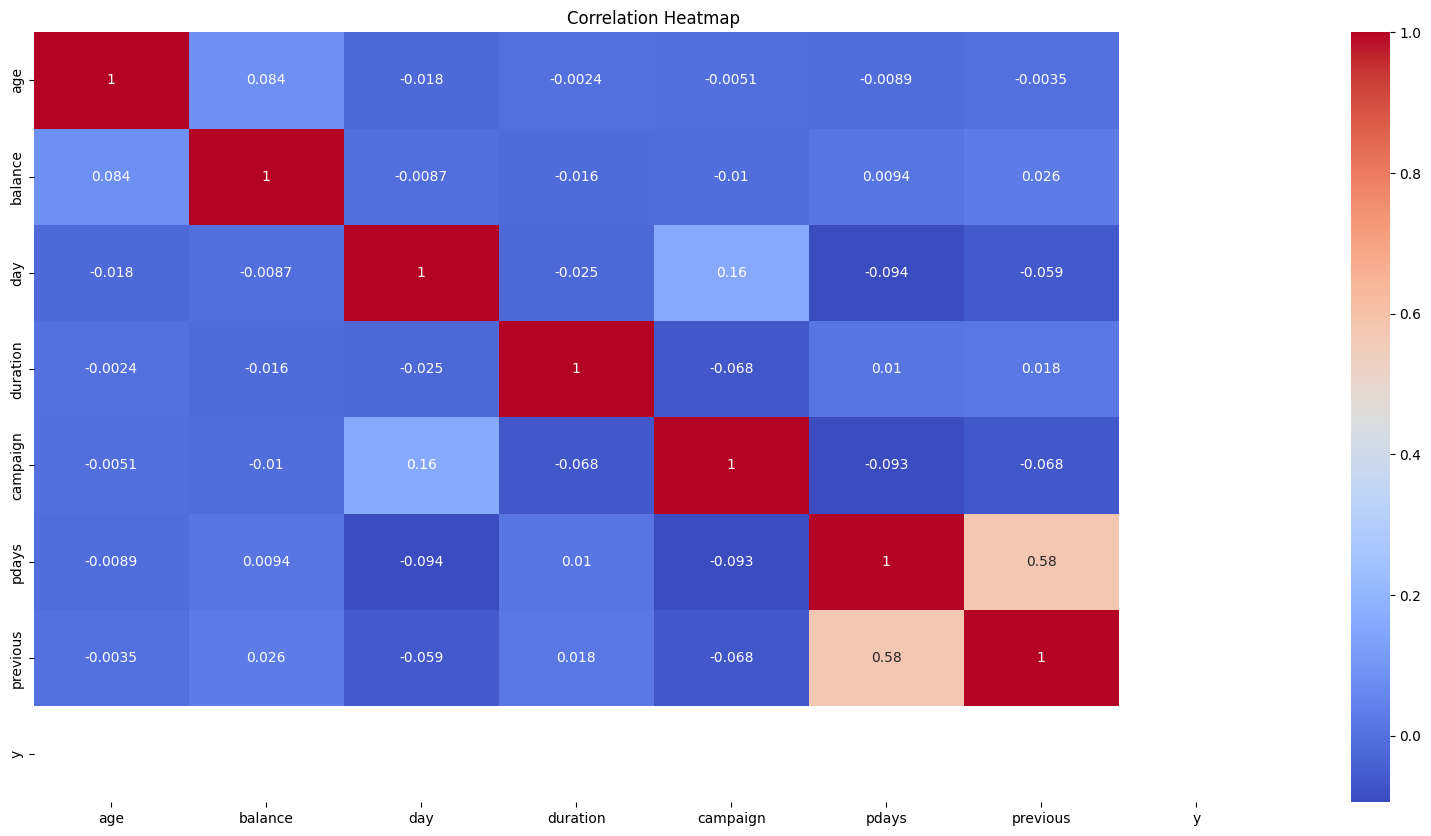

In [ ]:
# Optional: encode target
data_set['y'] = data_set['y'].map({'yes': 1, 'no': 0})

# Use only numeric features
numeric_df = data_set.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(20, 10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


Correlation Coefficients: Each cell in the heatmap displays a numerical value, which is the Pearson correlation coefficient between the two features intersecting at that cell. This coefficient ranges from -1 to +1:

+1: Indicates a perfect positive linear correlation (as one feature increases, the other increases proportionally).

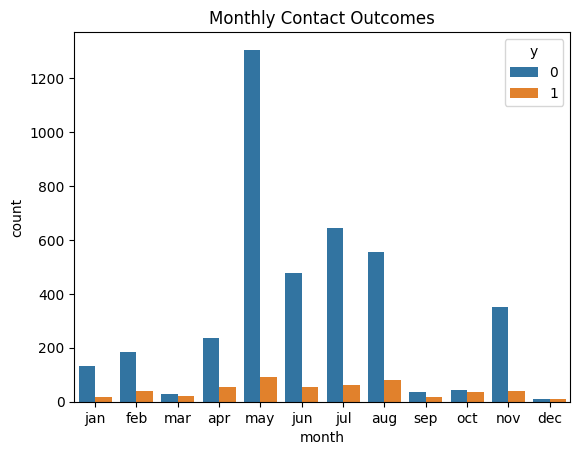

In [ ]:
sns.countplot(x='month', hue='y', data=data_set, order=["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"])
plt.title("Monthly Contact Outcomes")
plt.show()


Campaigns are more successful in May and july.



---



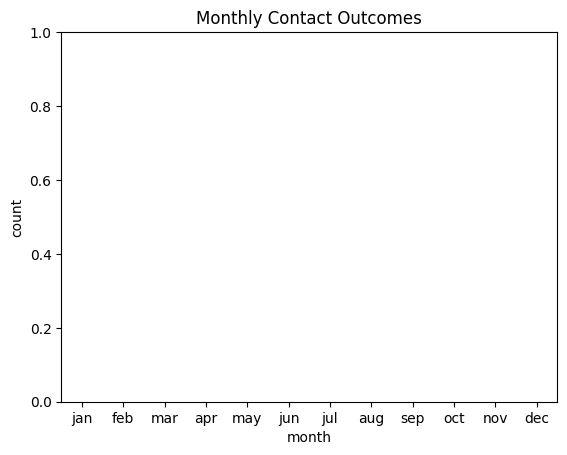

In [ ]:
sns.countplot(x='month', hue='y', data=data_set, order=["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"])
plt.title("Monthly Contact Outcomes")
plt.show()


**Age Group Analysis**

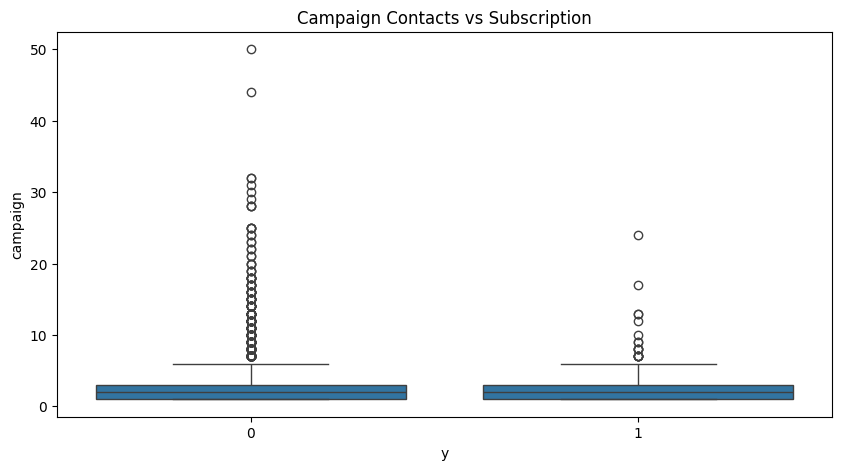

In [ ]:

plt.figure(figsize=(10, 5))
sns.boxplot(x='y', y='campaign', data=data_set)
plt.title("Campaign Contacts vs Subscription")
plt.show()

Why it's useful: It helps you understand if there's a difference in the number of campaign contacts for those who subscribed versus those who didn't, and also reveals the spread and presence of extreme values for each group.

Use Cases in Finance
A. High-Frequency Trading -Streaming time-series models trained on real-time tick data across distributed nodes.
B. Portfolio Optimization -Solving large optimization problems in parallel using reinforcement learning.
C. Risk Modeling -Federated learning for credit scoring across multiple institutions without sharing sensitive data.
D. Sentiment-Based Forecasting -Distributed NLP models analyzing news, tweets, earnings calls in real-time.

Challenges and Considerations
Data Heterogeneity: Financial data varies in format, frequency, and quality.
Latency Sensitivity: Predictions must be made quickly (especially in trading).
Security and Privacy: Especially in banking, GDPR/CCPA compliance matters.
Cost: Distributed systems are expensive to maintain

**Final outcome**

 Distributed Machine Learning offers transformative potential in the financial sector, enabling analysts, institutions, and AI systems to process massive datasets, extract actionable insights, and improve financial decision-making at scale. As both financial systems and data grow in complexity, distributed ML is becoming a necessity, not a luxury.  

